# Case Study: Data Preprocessing on Loan Approval Dataset

## 1. Objective
* The objective of this case study is to prepare the Loan Approval dataset for machine learning by performing data cleaning, imputation, categorical encoding, and feature scaling. This ensures that the dataset is ready for building robust predictive models.

## 2. Dataset Description

* Source: train_loan.csv

* Features: Includes both numerical and categorical variables like Gender, Married, ApplicantIncome, Credit_History, etc.

* Target variable: (Assumed for later modeling) Loan_Status

* Size: Checked via df.info()

* Initial Steps: Loaded using pandas, basic info and null checks performed using df.info(), df.describe(), and df.isnull().sum()

## 3. Methodology

The following preprocessing steps were performed:

* Handling missing values through imputation

* Outlier Detection

* Categorical encoding

* Feature Transformation and scaling

In [1]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [2]:
df = pd.read_csv('train_loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Gathering basic info

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()
#df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#getting statistical description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#checking for duplicates
df.duplicated().sum()

0

## 1 . Handling Missing Values and Performing Imputation

### 1. Gender Column

**Type:** Categorical

**Missing values:** 2%

**Imputation method used:** Mode

**Reason:** Mode imputation is suitable for categorical features as it replaces missing values with the most frequent category, preserving the distribution of the existing data.

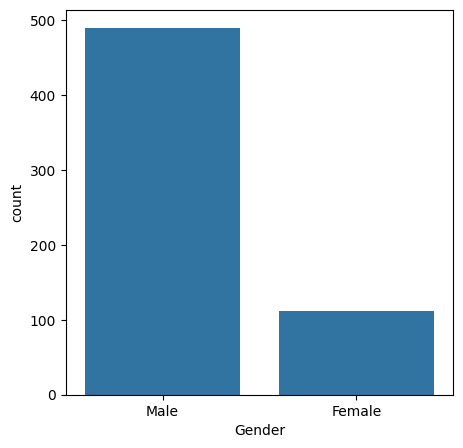

In [8]:
# Analyzing the data 
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=df)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

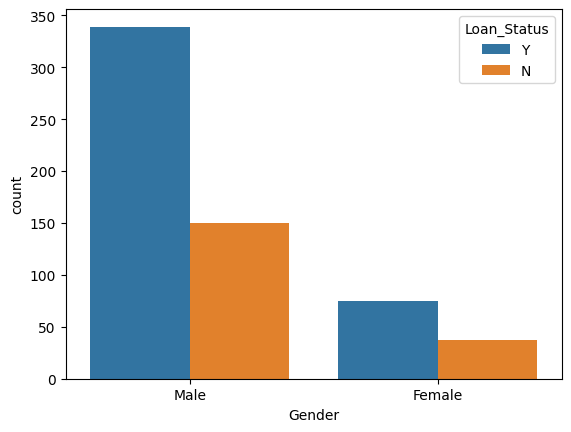

In [9]:
#analysing the relationship between data
sns.countplot(x='Gender', hue='Loan_Status', data=df)

In [10]:
# this is a categorical data, also the missing values account for around 2%, 
# so to prefer simple imputation method would be more preferable rather than going for advanced 
# imputation methods
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)
df['Gender'].isna().sum()

0

### 2. Column - Married

**Type:** Categorical

**Missing values:**  0.4%

**Imputation method used:** Mode

**Reason:** Mode imputation is suitable for categorical features as it replaces missing values with the most frequent category, preserving the distribution of the existing data.

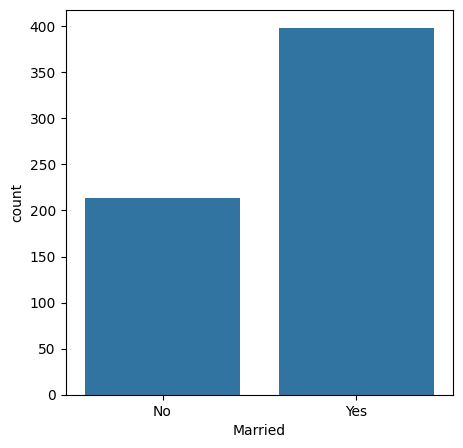

In [11]:
# Analysing the data
plt.figure(figsize=(5,5))
sns.countplot(x="Married", data=df)
plt.show()

<Axes: xlabel='Married', ylabel='count'>

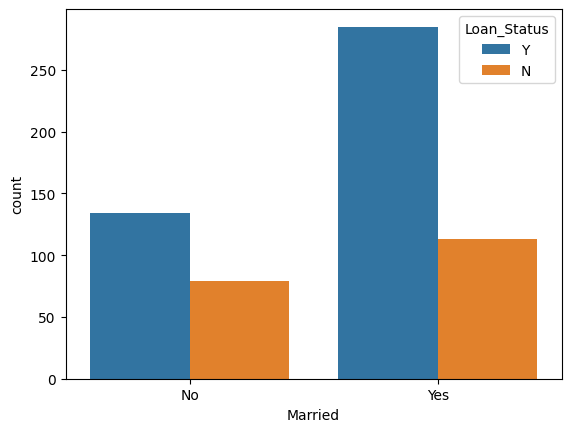

In [12]:
#Analysing the relationship between data
sns.countplot(x='Married', hue='Loan_Status', data=df)

In [13]:
# this is a categorical data and the missing data coount for around 0.4%, which isnt much a problem. 
# Imputing with mode

married_mode = df['Married'].mode()[0]
df['Married'] = df['Married'].fillna(married_mode)
df["Married"].isna().sum()

0

### 3. Column - Dependents

**Dependent Column Values:** 0, 1, 2, 3+

**Transformation:** Values of 3+ were replaced with 3.

**Reason for Transformation:** This is the best approach for ordinal data, as it preserves the order while handling the upper limit.

**Missing Values:** 2.4%

**Imputation Method:** Mode

**Feature Type:** Categorical

**Reason for Imputation:** Mode imputation is suitable for categorical features as it replaces missing values with the most frequent category, preserving the distribution of the existing data.

In [14]:
# Analysing the data
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

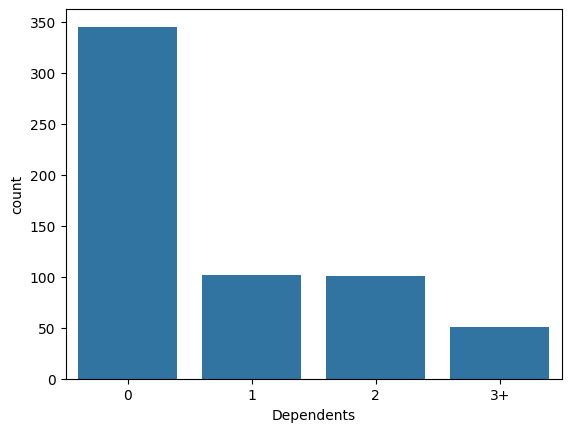

In [15]:
sns.countplot(x='Dependents' , data=df)

<Axes: xlabel='Dependents', ylabel='count'>

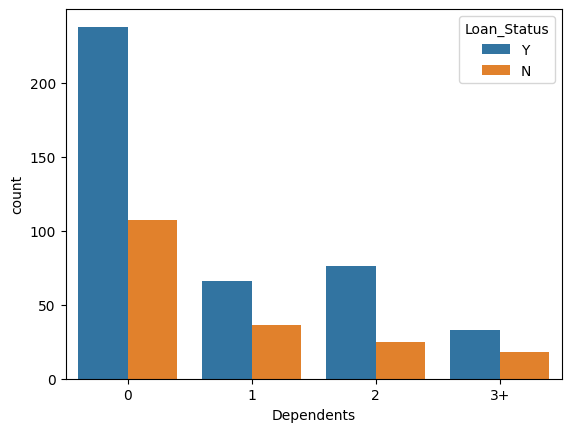

In [16]:
#Analysing relationship between data
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

In [17]:
# for the values that coount for 3+ replacing it with 3 is the best approach since its ordinal data
# missing filling values with mode, 2.4% missing data, categorical
df['Dependents'] = df['Dependents'].replace('3+', '3')
#convert to integer
df['Dependents'] = pd.to_numeric(df['Dependents'] , errors='coerce').astype('Int64')
# fill in the missing value with mode

mode_dependents = df['Dependents'].mode()[0]
df['Dependents'] = df['Dependents'].fillna(mode_dependents)

### 4 . Column - Self-Employed

**Type:** Categorical

**Missing values:**  5.2%

**Imputation method used:** Mode

**Reason:** Mode imputation is suitable for categorical features as it replaces missing values with the most frequent category, preserving the distribution of the existing data.

In [18]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

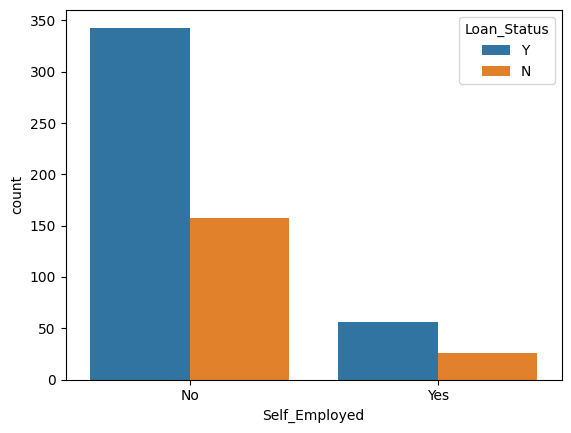

In [19]:
#Analysing the relationship between data
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

In [20]:
#categorical, missing - 5.2%, filling in with mode
mode_selfEmployed = df['Self_Employed'].mode()[0]
df['Self_Employed'] = df['Self_Employed'].fillna(mode_selfEmployed)

### 5. Column - Loan Amount

**Type:** Numerical

**Missing values:** 3.5%

**Skewness:** 2.67 (Right Skewed)

**Imputation method used:** Median

**Reason:** For numerical features with significant skewness, the median is a more robust measure of central tendency than the mean. It is less affected by extreme values, thus providing a more representative imputation for right-skewed data.

In [21]:
#numerical column - missing - 3.5% - high positive skewness, using median for imputation
df['LoanAmount'].isna().sum()

22

<Axes: xlabel='LoanAmount', ylabel='Count'>

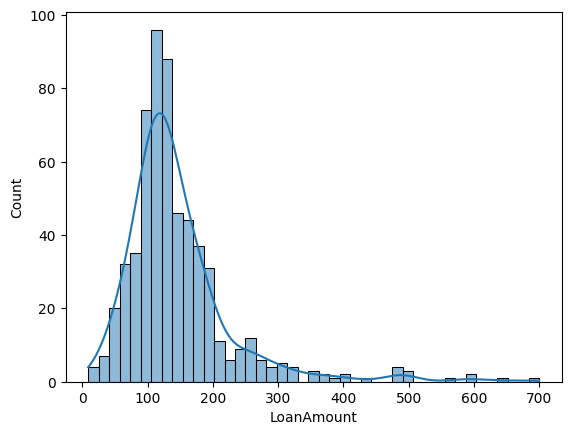

In [22]:
sns.histplot(x='LoanAmount', data=df, kde=True)

In [23]:
df['LoanAmount'].skew()

2.677551679256059

In [24]:
med_LoanAmount = df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(med_LoanAmount)

### 4. Column - Loan Amount Term

**Type:** Categorical

**Missing values:** 2.2%

**Imputation method used:** Mode

**Reason:** Mode imputation is suitable for categorical features as it replaces missing values with the most frequent category, preserving the distribution of the existing data.

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

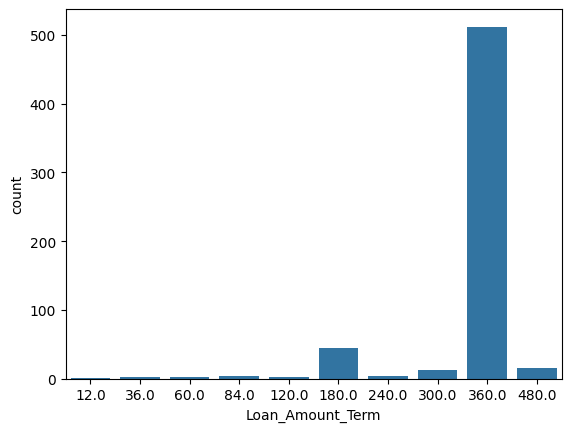

In [25]:
sns.countplot(x='Loan_Amount_Term', data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

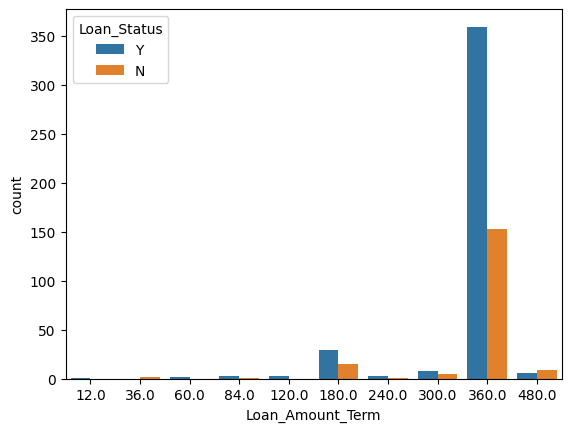

In [26]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)

In [27]:
#categorical data, missing value-2.2%, filling in with mode.

df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [28]:
md_LAT = df['Loan_Amount_Term'].mode()[0]
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(md_LAT)

### 5. Column - Credit History 

**Type:** Categorical

**Missing values:** 8%

**Imputation method used:** Mode

**Reason:** Mode imputation is suitable for categorical features as it replaces missing values with the most frequent category, preserving the distribution of the existing data.

In [29]:
#categorical , missing vales are around 8%, can do mode or conditional imputation
# why conditional - just because i found a pattern for the missingness with target variable, 
# found existing missing was not random
df[df['Credit_History'].isnull()]['Loan_Status'].value_counts()

Loan_Status
Y    37
N    13
Name: count, dtype: int64

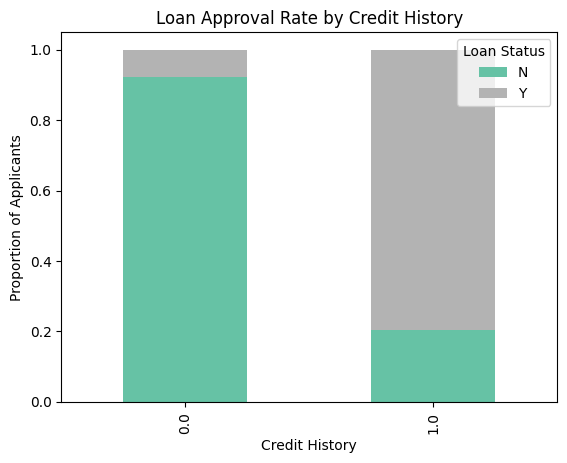

In [30]:
#Analysing relationship between data
approval_rate = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()

# Plot
approval_rate.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Loan Approval Rate by Credit History')
plt.ylabel('Proportion of Applicants')
plt.xlabel('Credit History')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [31]:
# conditional imputation
#df.loc[(df['Credit_History'].isnull()) & (df['Loan_Status']=="Y"), 'Credit_History'] = 1.0
#df.loc[(df['Credit_History'].isnull()) & (df['Loan_Status']=="N"), 'Credit_History'] = 0.0

In [32]:
#imputing with mode

mode_creditHistory = df['Credit_History'].mode()[0]
df['Credit_History'] = df['Credit_History'].fillna(mode_creditHistory)

In [33]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outlier Detection

### There are a couple of ways we can detect outliers, such as:

* **Using visualization:**
    * Boxplots
    * Violin plots
    * Histograms
    * Scatter plots
    * ( and much more )
    

* **Using calculations:**
    * Percentile or IQR (Interquartile Range) range calculations 
    * Z-score - if data is normally distributed
    
* In our case - data is not normally distributed for either three columns (ApplicantIncome, CoapplicantIncome, LoanAmount), so IQR / percentile range calculation is choosen to detect outliers. 

2.  **Understand Cause:**
    * Errors (fix if possible).
    * Genuine (handle carefully).

3.  **Treatment:**
    * **Remove:** Simplify, but can lose info.
    * **Transform:** Reduce impact (log, square root, Yeo-Johnson).
    * **Cap:** Limit extreme values to a defined range, preserving data points.(Winsorization)
    * **Impute:** Replace (mean, median) - can distort.
    * **Keep:** Use robust models or flag.
    

ApplicantIncome         Axes(0.125,0.53;0.352273x0.35)
CoapplicantIncome    Axes(0.547727,0.53;0.352273x0.35)
LoanAmount              Axes(0.125,0.11;0.352273x0.35)
dtype: object

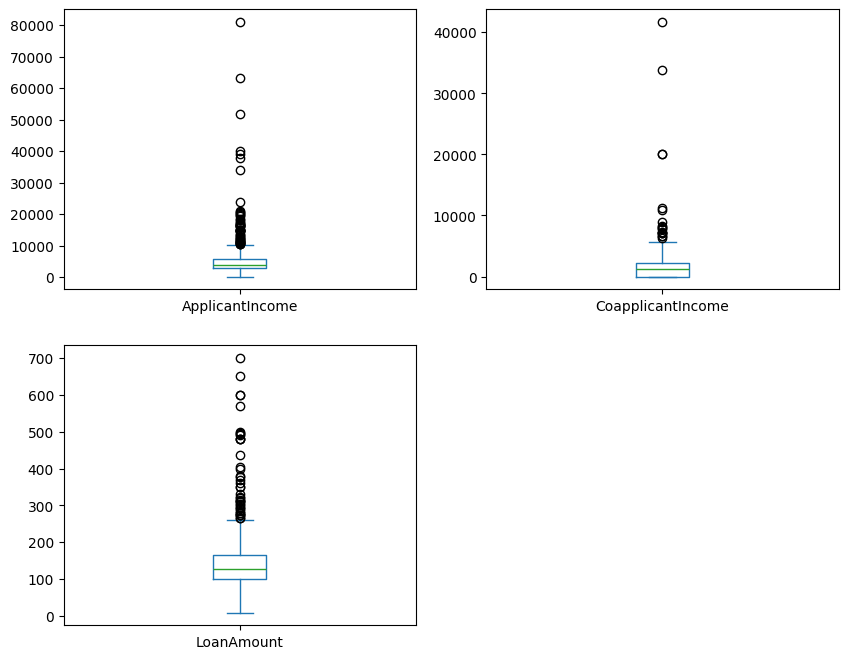

In [34]:
df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 8))

### ApplicantIncome

<Figure size 800x600 with 0 Axes>

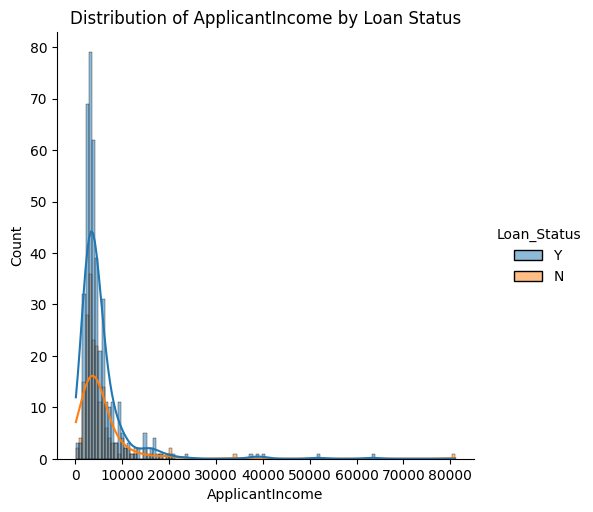

In [35]:
plt.figure(figsize=(8,6))
sns.displot(data=df, x='ApplicantIncome', hue='Loan_Status', kde=True)
plt.title('Distribution of ApplicantIncome by Loan Status')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

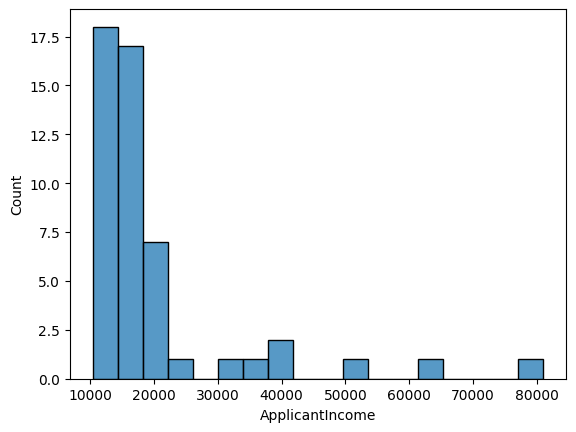

In [36]:
#doing IQR range calculation on Applicant Income to detect outliers

Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#dataframe containing all outliers of applicant income
outliers_iqr = df[(df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)]


#displaying outliers
sns.histplot(x='ApplicantIncome', data=outliers_iqr)

In [37]:
#capping example
#calculating thresholds using percentile calculations
''' lower_threshold = df['ApplicantIncome'].quantile(0.05)  # 0.1th percentile
upper_threshold = df['ApplicantIncome'].quantile(0.95)  # 99.9th percentile

print(f"0.1st percentile of ApplicantIncome: {lower_threshold_percentile}")
print(f"98th percentile of ApplicantIncome: {upper_threshold_percentile}")

# Apply capping to 'ApplicantIncome' using these percentiles
df['ApplicantIncome_Capped'] = df['ApplicantIncome'].clip(lower=lower_threshold_percentile, upper=upper_threshold_percentile)
'''

' lower_threshold = df[\'ApplicantIncome\'].quantile(0.05)  # 0.1th percentile\nupper_threshold = df[\'ApplicantIncome\'].quantile(0.95)  # 99.9th percentile\n\nprint(f"0.1st percentile of ApplicantIncome: {lower_threshold_percentile}")\nprint(f"98th percentile of ApplicantIncome: {upper_threshold_percentile}")\n\n# Apply capping to \'ApplicantIncome\' using these percentiles\ndf[\'ApplicantIncome_Capped\'] = df[\'ApplicantIncome\'].clip(lower=lower_threshold_percentile, upper=upper_threshold_percentile)\n'

### Coapplicant Income

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

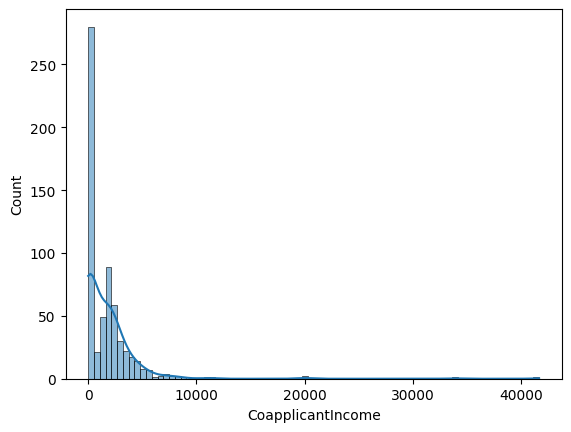

In [38]:
sns.histplot(x='CoapplicantIncome', data=df , kde=True)

In [39]:
#doing IQR range calculation on Co-Applicant Income to detect outliers

Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#dataframe containing all outliers of applicant income
outliers_iqr_c = df[(df['CoapplicantIncome'] < lower_bound) | (df['CoapplicantIncome'] > upper_bound)]

outliers_iqr_c

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
177,LP001610,Male,Yes,3,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


In [40]:
#calculating thresholds using percentile calculations
#example of clipping
'''
lower_threshold = df['CoapplicantIncome'].quantile(0.05)  # 0.1th percentile
upper_threshold = df['CoapplicantIncome'].quantile(0.95)  # 99.9th percentile

print(f"0.1st percentile of CoapplicantIncome: {lower_threshold_percentile}")
print(f"98th percentile of CoapplicantIncome: {upper_threshold_percentile}")

# Apply capping to 'CoApplicantIncome' using these percentiles
df['CoapplicantIncome_Capped'] = df['CoapplicantIncome'].clip(lower=lower_threshold_percentile, upper=upper_threshold_percentile)
'''

'\nlower_threshold = df[\'CoapplicantIncome\'].quantile(0.05)  # 0.1th percentile\nupper_threshold = df[\'CoapplicantIncome\'].quantile(0.95)  # 99.9th percentile\n\nprint(f"0.1st percentile of CoapplicantIncome: {lower_threshold_percentile}")\nprint(f"98th percentile of CoapplicantIncome: {upper_threshold_percentile}")\n\n# Apply capping to \'CoApplicantIncome\' using these percentiles\ndf[\'CoapplicantIncome_Capped\'] = df[\'CoapplicantIncome\'].clip(lower=lower_threshold_percentile, upper=upper_threshold_percentile)\n'

### Loan Amount

<Axes: xlabel='LoanAmount', ylabel='Count'>

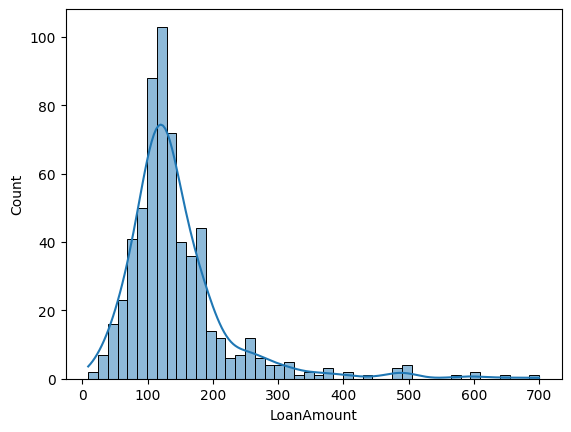

In [41]:
sns.histplot(x='LoanAmount', data=df, kde=True)

In [42]:
#doing IQR range calculation on Loan Amount to detect outliers

Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#dataframe containing all outliers of applicant income
outliers_iqr_l = df[(df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)]

#6% data is outlier - shape(41,13)
outliers_iqr_l.shape

(41, 13)

<Axes: xlabel='LoanAmount', ylabel='Count'>

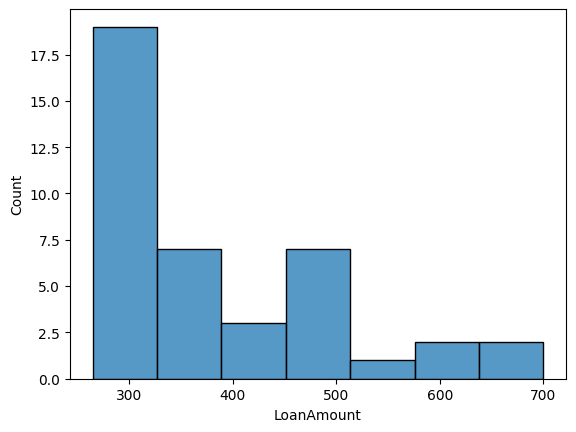

In [43]:
#displaying outliers

sns.histplot(x='LoanAmount', data=outliers_iqr_l)


# Categorical encoding

In [44]:
#drop Loan_ID Column - just an identifier
df.drop('Loan_ID', axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to label encode
categorical_cols_label_encode = ['Loan_Status', 'Gender', 'Married', 'Self_Employed', 'Education', 'Property_Area']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through the categorical columns and apply LabelEncoder
for col in categorical_cols_label_encode:
    df[col + '_Encoded'] = label_encoder.fit_transform(df[col])
    

# --- One-Hot Encoding for 'Loan_Amount_Term' ---
df = pd.get_dummies(df, columns=['Loan_Amount_Term'], drop_first=True, dtype=int)


# --- Note on original columns ---
#  to drop the original categorical columns after encoding if they are no longer needed.
for col in categorical_cols_label_encode:
    df.drop(col, axis=1, inplace=True)

In [46]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status_Encoded,Gender_Encoded,Married_Encoded,Self_Employed_Encoded,Education_Encoded,Property_Area_Encoded,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
0,0,5849,0.0,128.0,1.0,1,1,0,0,0,2,0,0,0,0,0,0,0,1,0
1,1,4583,1508.0,128.0,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,3000,0.0,66.0,1.0,1,1,1,1,0,2,0,0,0,0,0,0,0,1,0
3,0,2583,2358.0,120.0,1.0,1,1,1,0,1,2,0,0,0,0,0,0,0,1,0
4,0,6000,0.0,141.0,1.0,1,1,0,0,0,2,0,0,0,0,0,0,0,1,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dependents              614 non-null    Int64  
 1   ApplicantIncome         614 non-null    int64  
 2   CoapplicantIncome       614 non-null    float64
 3   LoanAmount              614 non-null    float64
 4   Credit_History          614 non-null    float64
 5   Loan_Status_Encoded     614 non-null    int32  
 6   Gender_Encoded          614 non-null    int32  
 7   Married_Encoded         614 non-null    int32  
 8   Self_Employed_Encoded   614 non-null    int32  
 9   Education_Encoded       614 non-null    int32  
 10  Property_Area_Encoded   614 non-null    int32  
 11  Loan_Amount_Term_36.0   614 non-null    int32  
 12  Loan_Amount_Term_60.0   614 non-null    int32  
 13  Loan_Amount_Term_84.0   614 non-null    int32  
 14  Loan_Amount_Term_120.0  614 non-null    in

# 4 . Feature Scaling & Transformation 

### 🔧 Feature Scaling & Transformation Strategy

## Transformation & Scaling Methods: Impact on Skewness & Outliers

**Transformation Methods:**

* **Log Transformation:**
    * **Skewness:** Primarily used to reduce right skewness (positive skew). Compresses higher values more than lower values.
    * **Outliers:** Can reduce the impact of high positive outliers by bringing them closer to the rest of the data. Not effective for left skew or negative outliers. Requires positive data (add a constant if needed).

* **Power Transformation (Box-Cox, Yeo-Johnson):**
    * **Skewness:** A family of transformations that can address both positive and negative skewness by finding the optimal power to make the data more normally distributed. Yeo-Johnson can handle zero and negative values.
    * **Outliers:** Can reduce the influence of outliers by transforming the data distribution. The effectiveness depends on the chosen power parameter.

* **Square Root Transformation:**
    * **Skewness:** Effective for reducing moderate right skewness. Less aggressive than the log transformation.
    * **Outliers:** Reduces the impact of high positive outliers, but less so than the log transformation. Requires non-negative data.

**Scaling Methods:**

* **Standard Scaling (Z-score):**
    * **Skewness:** Does not change the shape of the distribution, so it doesn't affect skewness. Centers the data around zero.
    * **Outliers:** Sensitive to outliers as mean and standard deviation are affected by them. Outliers will remain outliers in terms of Z-score.

* **Min-Max Scaling (Normalization):**
    * **Skewness:** Does not change the shape of the distribution, so it doesn't affect skewness. Scales data to a fixed range (typically \[0, 1]).
    * **Outliers:** Highly sensitive to outliers. Outliers can compress the majority of the data into a very small range.

* **Robust Scaling (using Median and IQR):**
    * **Skewness:** Does not fundamentally change the shape or skewness of the data.
    * **Outliers:** Less sensitive to outliers compared to Standard and Min-Max scaling because it uses the median and Interquartile Range (IQR), which are robust to extreme values. Can help to bring the scaled values of typical data points closer together when outliers are present.


- **`ApplicantIncome`** , **`LoanAmount`** and **`CoapplicantIncome`** were:
  - Transformed using **`log1p`** to reduce **right skewness** and stabilize variance.
  - Then scaled using **`StandardScaler`** to normalize the distribution (mean = 0, std = 1), which is beneficial for many machine learning models that assume normally distributed input features.



### Column - ApplicantIncome

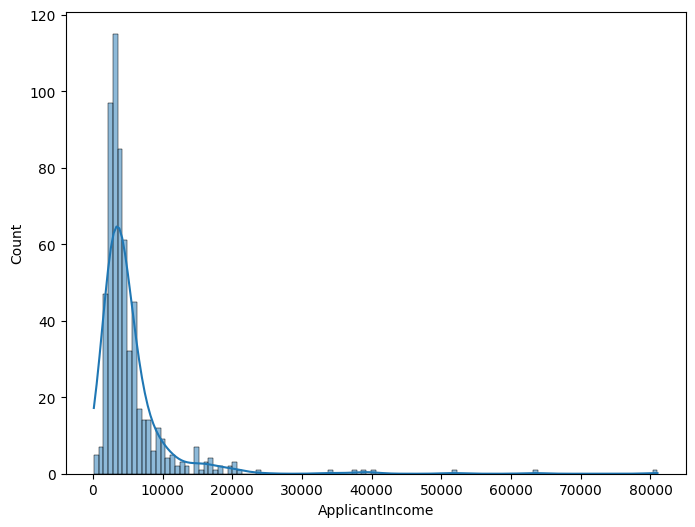

In [48]:
plt.figure(figsize=(8,6))
sns.histplot(x='ApplicantIncome', data=df, kde=True)
plt.show()

<Axes: xlabel='ApplicantIncome'>

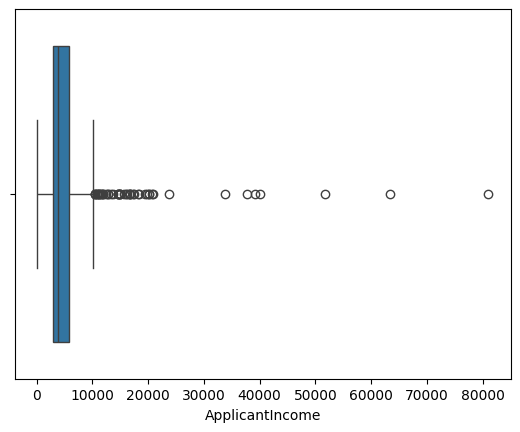

In [49]:
sns.boxplot(x='ApplicantIncome', data=df)

In [50]:
df['ApplicantIncome'].skew()


6.539513113994625

In [51]:
from sklearn.preprocessing import StandardScaler

# Step 1: Log transformation
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])

# Step 2: Standard scaling
scaler = StandardScaler()
df['scaled_ApplicantIncome'] = scaler.fit_transform(df[['ApplicantIncome_log']])
df['scaled_ApplicantIncome'] 

0      0.516186
1      0.137806
2     -0.519479
3     -0.751605
4      0.555727
         ...   
609   -0.572062
610   -0.032679
611    1.015921
612    0.918972
613    0.137806
Name: scaled_ApplicantIncome, Length: 614, dtype: float64

<Axes: xlabel='scaled_ApplicantIncome', ylabel='Count'>

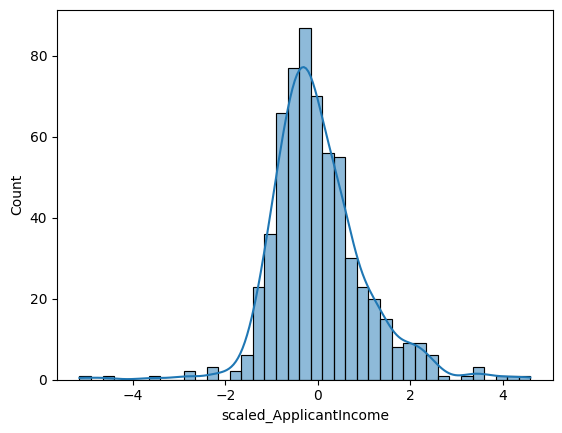

In [52]:
sns.histplot(x='scaled_ApplicantIncome', data=df, kde=True)

In [53]:
df['scaled_ApplicantIncome'].skew()

0.4821279953732788

### column - CoapplicantIncome

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

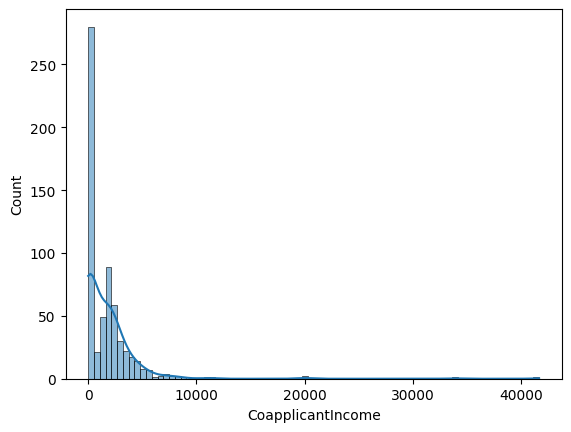

In [54]:
sns.histplot(x='CoapplicantIncome', data=df, kde=True)

<Axes: xlabel='CoapplicantIncome'>

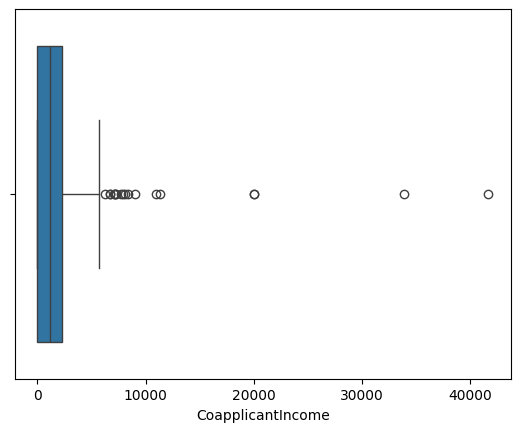

In [55]:
sns.boxplot(x='CoapplicantIncome', data=df)

In [56]:
df['CoapplicantIncome'].skew()

7.491531216657306

In [57]:
from sklearn.preprocessing import RobustScaler
# Highly skewed data
# have outliers


#applying log
df['log_CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

# apply standard scaling
df['scaled_CoapplicantIncome'] = scaler.fit_transform(df[['log_CoapplicantIncome']])

<Axes: xlabel='scaled_CoapplicantIncome', ylabel='Count'>

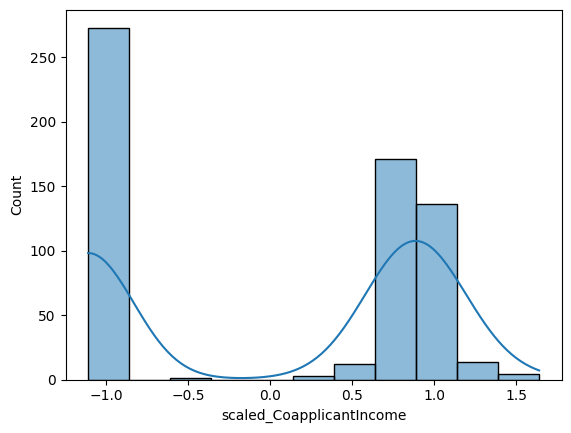

In [58]:
sns.histplot(x='scaled_CoapplicantIncome', data=df, kde=True)

In [59]:
df['scaled_CoapplicantIncome'].skew()

-0.1730732759923096

### Column - LoanAmount

<Axes: xlabel='LoanAmount', ylabel='Count'>

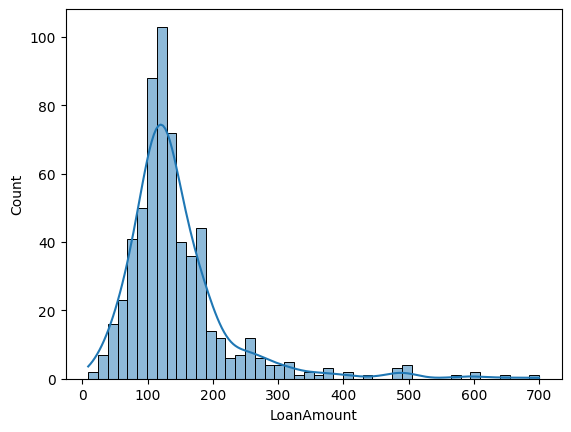

In [60]:
sns.histplot(x='LoanAmount', data=df, kde=True)

<Axes: xlabel='LoanAmount'>

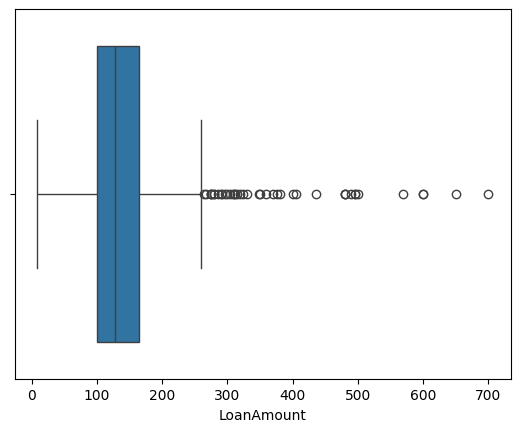

In [61]:
sns.boxplot(x='LoanAmount', data=df)

In [62]:
df['LoanAmount'].skew()

2.743052748820892

In [63]:
# right skewed data
# has outliers
# same approach as ApplicantIncome

df['LoanAmount_log']= np.log1p(df['LoanAmount'])
df['scaled_LoanAmount'] = scaler.fit_transform(df[['LoanAmount_log']])

In [64]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status_Encoded,Gender_Encoded,Married_Encoded,Self_Employed_Encoded,Education_Encoded,...,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,ApplicantIncome_log,scaled_ApplicantIncome,Sqrt_CoapplicantIncome,scaled_CoapplicantIncome,LoanAmount_log,scaled_LoanAmount
0,0,5849,0.0,128.0,1.0,1,1,0,0,0,...,0,0,1,0,8.674197,0.516186,0.000000,-1.107783,4.859812,-0.012803
1,1,4583,1508.0,128.0,1.0,0,1,1,0,0,...,0,0,1,0,8.430327,0.137806,7.319202,0.782158,4.859812,-0.012803
2,0,3000,0.0,66.0,1.0,1,1,1,1,0,...,0,0,1,0,8.006701,-0.519479,0.000000,-1.107783,4.204693,-1.348663
3,0,2583,2358.0,120.0,1.0,1,1,1,0,1,...,0,0,1,0,7.857094,-0.751605,7.765993,0.897526,4.795791,-0.143351
4,0,6000,0.0,141.0,1.0,1,1,0,0,0,...,0,0,1,0,8.699681,0.555727,0.000000,-1.107783,4.955827,0.182981


<Axes: xlabel='scaled_LoanAmount', ylabel='Count'>

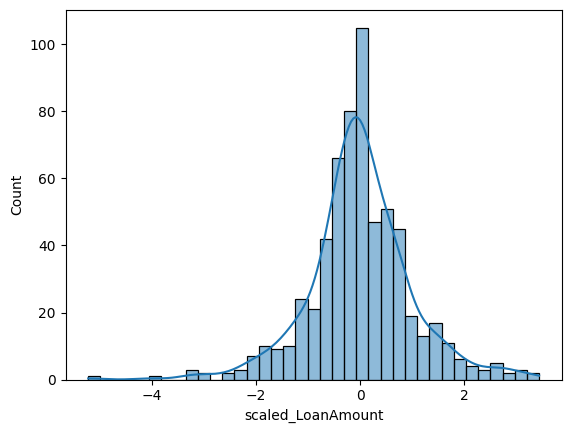

In [65]:
sns.histplot(x='scaled_LoanAmount', data=df, kde=True)

In [66]:
df['scaled_LoanAmount'].skew()

-0.15157750539614148

In [68]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status_Encoded,Gender_Encoded,Married_Encoded,Self_Employed_Encoded,Education_Encoded,...,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,ApplicantIncome_log,scaled_ApplicantIncome,Sqrt_CoapplicantIncome,scaled_CoapplicantIncome,LoanAmount_log,scaled_LoanAmount
0,0,5849,0.0,128.0,1.0,1,1,0,0,0,...,0,0,1,0,8.674197,0.516186,0.000000,-1.107783,4.859812,-0.012803
1,1,4583,1508.0,128.0,1.0,0,1,1,0,0,...,0,0,1,0,8.430327,0.137806,7.319202,0.782158,4.859812,-0.012803
2,0,3000,0.0,66.0,1.0,1,1,1,1,0,...,0,0,1,0,8.006701,-0.519479,0.000000,-1.107783,4.204693,-1.348663
3,0,2583,2358.0,120.0,1.0,1,1,1,0,1,...,0,0,1,0,7.857094,-0.751605,7.765993,0.897526,4.795791,-0.143351
4,0,6000,0.0,141.0,1.0,1,1,0,0,0,...,0,0,1,0,8.699681,0.555727,0.000000,-1.107783,4.955827,0.182981


In [ ]:
#cleanup

columns_to_drop = ['ApplicantIncome_log', 'log_CoapplicantIncome', 'LoanAmount_log']